# House price prediction data set

Consisting of 4600 entries for homes in different US cities, this dataset includes 18 different variables that describe various property details such as size and location characteristics. 

**Columns:**

date: Date the house was sold<br>
price: Sale price of the house (Prediction target)<br>
bedrooms: Number of the bedrooms<br>
bathrooms: Number the bathrooms<br>
sqft_living: Square footage of the home<br>
sqft_lot: Square footage of the lot<br>
floors: Total floors (levels) in the house<br>
waterfront: House which has a view to a waterfront<br>
view: Number of views<br>
condition: How good the condition is overall<br>
sqft_above: Square footage of the house apart from basement<br>
sqft_basement: Square footage of the basement<br>
yr_built: Building year of the house<br>
yr_renovated: Renovation year of the house<br>
street: Street where the house is located<br>
city: City where the house is located<br>
statezip: Zip code of the region where the house is located<br>
country: Country where the house is located (USA)<br>


There are 8 categorical (half nominal and half ordinal depending on the measurement level) and 9 discrete variables.

Our ordinal variables, waterfront, view and and renovation year, appear numerically, but we will evaluate them in two categories, 0 and 1, depending on whether they are in the relevant house or not. Also, the condition has 5 unique values that increase from 1 to 5 based on the state of the house. And as you might guess, street, city, statezip, and country are the nominal ones.

**Types of Data**
1. Categorical (gender, blood type, aswers of yes/no questions, satisfaction/condition level etc.)
2. Numerical<br>
a. Discrete (finite numbers- # of children/customer/room, physical money, time on a clock etc.)<br>
b. Continuous (infinite numbers- measurements(weight, height), time in general etc.)<br>

**Levels of Measurement**
1. Qualitative<br>
a. Nominal (Can not be ordered- gender, blood type, seasons)<br>
b. Ordinal (Takes values with an order or rank- satisfaction, condition level)<br>
2. Quantitative<br>
a. Interval (Don't have a true zero- temperature, pH, IQ test etc.)<br>
b. Ratios (Have a true zero- temperature only in Kelvin, amount, distance, pulse etc.)<br>



# Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
import math

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import statsmodels.api as sm

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
import sklearn.metrics as metrics

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading and Exploring the data set

In [9]:
raw_data = pd.read_csv("../input/housedata/data.csv")

In [10]:
# Quick look to the data

raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [11]:
# Checking for missing values and data types of each column

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [12]:
# Added "include="all"" parameter to see all columns. (to see not only numeric ones)
# Based on the unique value count, city can be used by converting to dummies

raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4600,70,2014-06-23 00:00:00,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0


In [13]:
# Let's check the accuracy of Linear regression without any data preprocessing

# Define the variables
x1 = raw_data.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis = 1) 
y = raw_data['price']

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1's
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an independent x
results = sm.OLS(y,x).fit()
# Print a summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     116.1
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          5.03e-235
Time:                        15:23:45   Log-Likelihood:                -66877.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4588   BIC:                         1.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.584e+06   6.85e+05      6.689      0.000    3.24e+06    5.93e+06
bedrooms      -5.804e+04   1.05e+04     -5.531      0.000   -7.86e+04   -3.75e+04
bathrooms       5.72e+04    1.7e+04      3.363      0.001    2.39e+04    9.05e+04
sqft_living     164.4116      9.779     16.813      0.000     145.241     183.582
sqft_lot         -0.6912      0.213     -3.250      0.001      -1.108      -0.274
floors         3.981e+04   1.87e+04      2.129      0.033    3143.011    7.65e+04
waterfront     3.553e+05   9.38e+04      3.789      0.000    1.71e+05    5.39e+05
view            4.57e+04    1.1e+04      4.167      0.000    2.42e+04    6.72e+04
condition      3.184e+04    1.3e+04      2.441      0.015    6269.622    5.74e+04
sqft_above       97.0378      9.714      9.989      0.000      77.993     116.082
sqft_basement    67.3738     13.661      4.932      0.000      40.591      94.157
yr_built      -2378.2101    341.615     -6.962      0.000   -3047.939   -1708.481
yr_renovated      6.5727      8.634      0.761      0.447     -10.355      23.500
==============================================================================
Omnibus:                    12845.801   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        601962895.545
Skew:                          35.530   Prob(JB):                         0.00
Kurtosis:                    1773.770   Cond. No.                     1.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Interpreting the Regression Table

I used OLS (Ordinary least squares) model from statsmodel, which is often used in linear regression analysis. It compares the difference between individual points in our data set and the predicted best fit line to measure the amount of error produced.

In order to interpret this summary and to get an overview of the statistics here, we need to know the components in the table. I will try to explain the most important ones in my opinion.

Typically when using statsmodels we have three main tables. The table called the model summary, which is at the top of the summary, contains information that is mostly known to us; such as **dependent variable, model, method, date and time we created the model, number of observations.

**DF Residuals** is widely used in many contexts throughout statistics, including hypothesis testing, probability distributions, and regression analysis. It is represents the degrees of freedom of our model, the formula is given below.
'(number of observations) - (number of predicting variables - 1)'<br>
'(n-k-1 = 4600-11-1 = 4588)'. <br>


**R-squared** is one of the most important explanatory power, a measure of how much of the independent variable is explained by changes in our dependent variables. R-squared 0 means our regression explains NONE of the variabilty of the data, while R-sguared equal 1 means it explains the entire variability. In our case, the model can only explain 21% of our dataset.

Checking the **adjusted R-squared** is essential to analyze the effectiveness of multiple dependent variables on the model. Excessive use of variables is penalized when measuring, so while adding some variables that don't contribute to our model can increase our R-square, it often has a negative impact on the adjusted R-squared. It is always smaller than R squared.

In the second part of our summary, the table of coefficients, I want to focus on the coefficients of the **intercept** (the constant, they can be used interchangeably) first. This component expresses the biases of our model.(b0, b1 etc.) For each variable, it is the measure of how the change in that variable affects the independent one.

**The standard error**, indicates the accuracy of our prediction for each variable. Lower the standard error better the estimate :)

There are also other values called **t statistics and its P-value**. The null hypothesis in this test is H0: B=0 (Is the coefficient equal to zero?) *P-value < 0.05 means that the variable is significant. 0.000 shows us size is a significant variable when predicting house prices!

As can be clearly seen from the explanations I have made so far, our model needs improvements. Let's start working on it!

# Dealing with missing values

There is no NaN value in our data set, but it would be good to check 0's or 999's for the sake of data consistency. I don't see any irrelevant max values in the describe output but there are some zeros to check.

We have to deal with 49 houses that look free, plus 2 houses each without a bedroom and a bathroom. Since they are few in number, we can remove these values directly from our data set, but since I want to try a few different methods, I will try to keep them by replacing them with appropriate values.

I will leave waterfront as it is because zero values indicate there is no "waterfront" rather than the information being unknown. Same for: view, sqft_basement and yr_renovated. 


In [14]:
raw_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [15]:
raw_data[raw_data==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [16]:
zero_price = raw_data[raw_data['price']==0]
zero_price.describe().T

,count,mean,std,min,25%,50%,75%,max
price,49.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
bedrooms,49.0,3.979592,1.108486,1.0,3.0,4.0,5.0,6.00
bathrooms,49.0,2.698980,1.194584,1.0,2.0,2.5,3.5,6.25
sqft_living,49.0,2787.142857,1354.375625,720.0,1910.0,2600.0,3500.0,8020.00
sqft_lot,49.0,16453.306122,27739.227932,3500.0,6863.0,9000.0,13783.0,188200.00
floors,49.0,1.500000,0.520416,1.0,1.0,1.5,2.0,3.00
waterfront,49.0,0.061224,0.242226,0.0,0.0,0.0,0.0,1.00
view,49.0,0.795918,1.485760,0.0,0.0,0.0,0.0,4.00
condition,49.0,3.673469,0.826331,2.0,3.0,3.0,4.0,5.00
sqft_above,49.0,2295.714286,1337.148708,720.0,1310.0,1990.0,3020.0,8020.00


<AxesSubplot:>

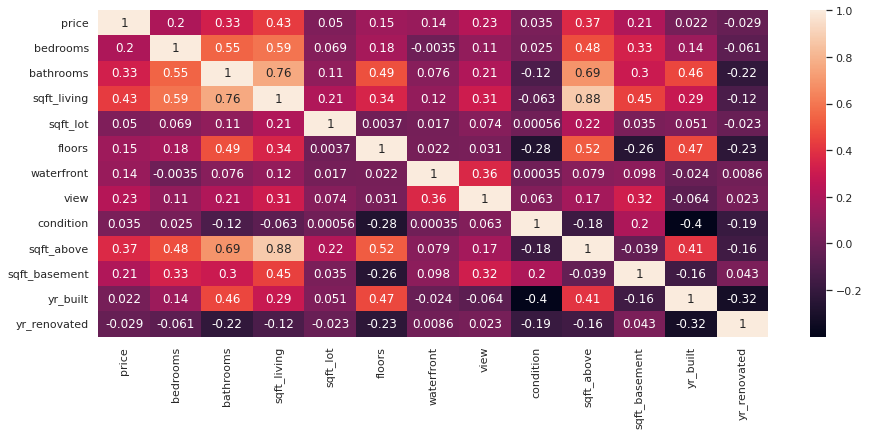

In [17]:
# In order to decide what to do with the null values in the price, 
# it is helpful to know the corelations between features.

corr_matrix = raw_data.corr()

fig, ax = plt.subplots(figsize = (15,6))
sns.heatmap(corr_matrix, annot = True)

In [18]:
# By looking at the median value of the sqft_living variable, which affects the price the most,
# I divided the prices that appear 0 into two groups. 
# Afterwards, I decided on the value that I would assign to the empty prices in these two groups 
# by looking at the median values of the 3 variables that most affected the price value.

low_price_data = raw_data[(raw_data['sqft_living'] < zero_price['sqft_living'].median()) &
         (raw_data['bathrooms'] < zero_price['bathrooms'].median()) &
         (raw_data['sqft_above'] < zero_price['sqft_above'].median()) ]
low_price = low_price_data.price.median()

high_price_data = raw_data[(raw_data['sqft_living'] > zero_price['sqft_living'].median()) &
         (raw_data['bathrooms'] > zero_price['bathrooms'].median()) &
         (raw_data['sqft_above'] > zero_price['sqft_above'].median()) ]
high_price = high_price_data.price.median()

data_prc = raw_data.copy()
data_prc['price'] = np.where(((data_prc['price']==0) & (data_prc['sqft_living'] > zero_price['sqft_living'].median())), high_price, data_prc.price) 
data_prc['price'] = np.where(((data_prc['price']==0) & (data_prc['sqft_living'] <= zero_price['sqft_living'].median())), low_price, data_prc.price)

data_prc.price[data_prc.price==0].count()

0

Text(0.5, 1.0, 'Bathrooms')

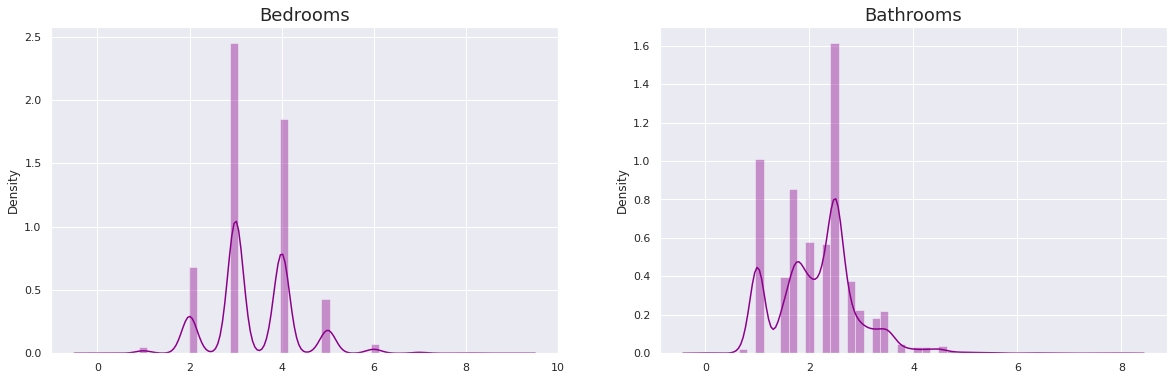

In [19]:
# I will print the distrubution plots to decide 
# which method to use fill in the unknown zero values in the bedrooms and batromms columns.
# As you may notice, there is some skewness that will affect the mean of both features. 
# I will use the median imputation for replacing zero values.

fig, ax = plt.subplots(1,2, figsize = (20,6))

sns.distplot(ax = ax[0], x= data_prc.bedrooms, color='darkmagenta')
ax[0].set_title('Bedrooms', size = 18)
sns.distplot(ax = ax[1], x = data_prc.bathrooms, color='darkmagenta')
ax[1].set_title('Bathrooms', size = 18)

In [20]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
0.0,0.000000,3937.000000,16386.000000,2.750000,0.000000,1.000000,3.000000,3937.000000,0.000000,1990.000000,2009.000000
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.996924,1829.022638,13249.980315,1.472195,0.006890,0.187008,3.465551,1595.616634,233.406004,1971.444390,804.400098
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000


In [21]:
data_prc['bedrooms'] = data_prc['bedrooms'].replace(0, np.NaN)
data_prc['bedrooms'] = data_prc['bedrooms'].fillna(data_prc.bedrooms.median())

data_prc.bedrooms[data_prc.bedrooms==0].count()

0

In [22]:
data_prc['bathrooms'].replace(to_replace = 0, value = data_prc.bathrooms.median(), inplace= True)

data_prc.bathrooms[data_prc.bathrooms==0].count()

0

In [23]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.997173,1831.095379,13253.063913,1.473451,0.006883,0.187807,3.465093,1597.918879,233.176500,1971.462635,805.584562
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000
9.0,4.500000,3830.000000,6988.000000,2.500000,0.000000,0.000000,3.000000,2450.000000,1380.000000,1938.000000,2003.000000


# Dealing with outliers

One of the most important parts of data preprocessing is detecting and treating the outliers as they affect our analysis and training process in a bad way.

Simply, an outlier is an observation that lies far from the rest of the observations in a given dataset and they cause a skew. We can use some techniques such as boxplots, Z-score or Inter Quantile Range(IQR) to detect outliers. 

After determining these values, the next step is to decide what to do with these values. We can remove these values, use either method quarter-based flooring and covering, or mean/median imputation.

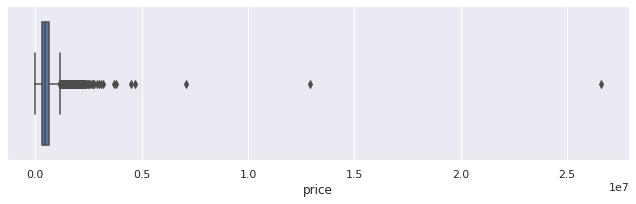

In [24]:
# A great step in the data exploration is to display the boxplot to see outliers

sns.catplot(x='price', data=data_prc, kind='box', height=3, aspect=3)

<AxesSubplot:xlabel='price', ylabel='Density'>

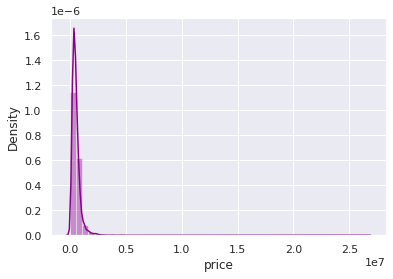

In [25]:
# Also we can print the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, icluded outliers
# The PDF is often the basis on which we decide whether we want to transform a feature

sns.distplot(data_prc.price, color='darkmagenta')

In [26]:
# I will use the IQR measurement for removing outliers.

Q75 = np.percentile(data_prc['price'],75)
Q25 = np.percentile(data_prc['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

data1 = data_prc[(data_prc['price']<upper)]



25.070457468172982 , 0.7257728771054042


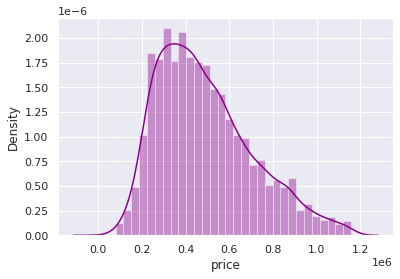

In [27]:
# What a change!

sns.distplot(data1.price, color='darkmagenta') 

print(data_prc['price'].skew(),',', data1['price'].skew())

In [28]:
data1.columns.values

array(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'street', 'city', 'statezip', 'country'], dtype=object)

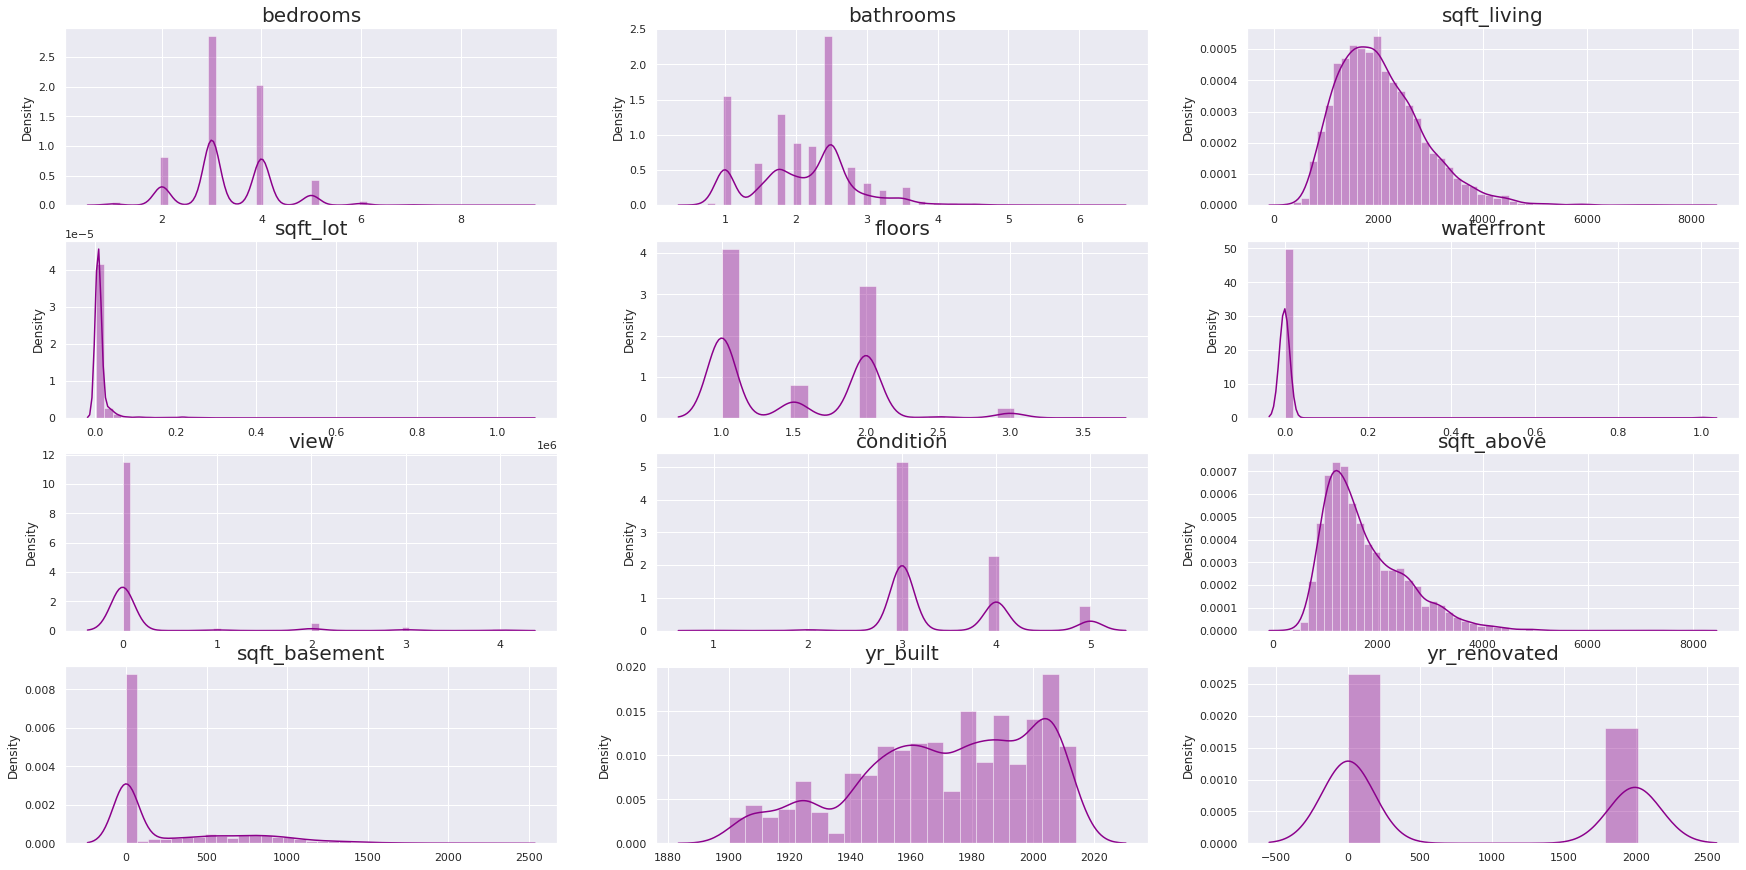

In [29]:
# Let's look other variables.

cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

fig, ax = plt.subplots(4,3, figsize = (30,15))

for idx, col in enumerate(cols):
    rn = math.floor(idx/3)
    cn = idx%3
    sns.distplot(ax=ax[rn,cn], x=data1[col], color='darkmagenta')
    ax[rn,cn].set_title(col, size=20)

1.0      38
2.0     562
3.0    1990
4.0    1414
5.0     297
6.0      49
7.0      10
8.0       1
9.0       1
Name: bedrooms, dtype: int64


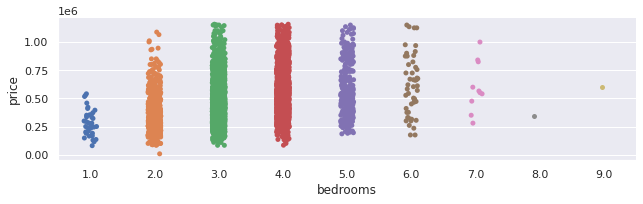

In [30]:
# bedrooms:
print(data1.bedrooms.value_counts().sort_index())
sns.catplot(x='bedrooms', y='price', data=data1, height=3, aspect=3)

In [31]:
# The number of houses with 7,8 and 9 bedrooms seems very low. 
# I will subtract these values

data2 = data1[data1.bedrooms<7]

In [32]:
# I could not understand the meaning of 0.75 or 1.25 bathroom houses. 
# I'll first convert their types to integers.

data2.bathrooms.value_counts().sort_index()

0.75      17
1.00     742
1.25       3
1.50     288
1.75     620
2.00     422
2.25     404
2.50    1148
2.75     261
3.00     147
3.25     103
3.50     120
3.75      28
4.00      15
4.25      11
4.50      12
4.75       2
5.00       4
5.25       1
5.50       1
6.25       1
Name: bathrooms, dtype: int64

0      17
1    1653
2    2235
3     398
4      40
5       6
6       1
Name: bathrooms, dtype: int64


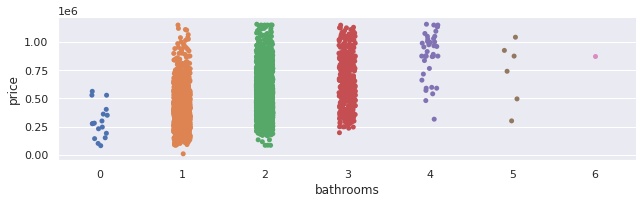

In [33]:
data2.bathrooms = data2.bathrooms.astype(int)
print(data2.bathrooms.value_counts().sort_index())

sns.catplot(x='bathrooms', y='price', data=data2, height=3, aspect=3)

In [34]:
data3 = data2[data2.bathrooms<4]

In [35]:
q = data3.sqft_living.quantile(0.99)
data4 = data3[data3.sqft_living<q]
print(data3.sqft_living.skew(),',', data4.sqft_living.skew())

0.7556982006741865 , 0.5233236461468229


(-100000.0, 1300000.0)

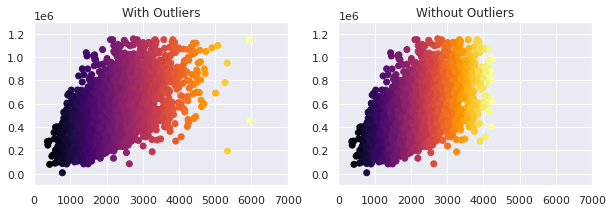

In [36]:
# There is still some skew
# But when we look at the price versus scatter plot, it looks much better now.

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_living', y= 'price', data = data3, c= 'sqft_living', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(0,7000)
ax1.set_ylim(-0.1e6,1.3e6)
ax2.scatter(x= 'sqft_living', y= 'price', data = data4, c= 'sqft_living', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(0,7000)
ax2.set_ylim(-0.1e6,1.3e6)

In [37]:
q = data4.sqft_lot.quantile(0.99)
data5 = data4[data4.sqft_lot<q]

Text(0.5, 1.0, 'Without Outliers')

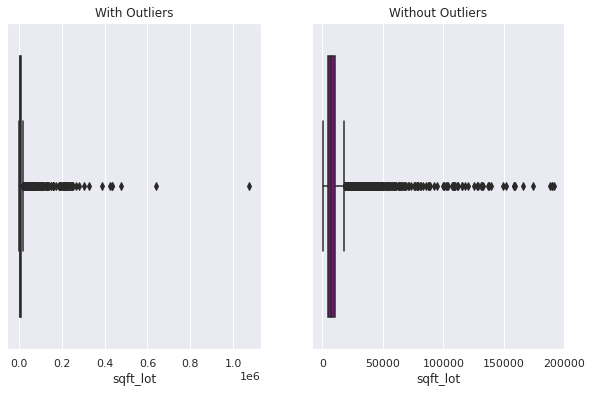

In [38]:
# Let's compare the boxplots this time, there is a visible improvement.

fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(ax=ax[0], x=data4.sqft_lot, color = 'darkmagenta')
ax[0].set_title('With Outliers')
sns.boxplot(ax=ax[1], x=data5.sqft_lot, color = 'darkmagenta')
ax[1].set_title('Without Outliers')

In [39]:
data5.floors.value_counts()

1.0    2097
2.0    1566
1.5     409
3.0     119
2.5      23
3.5       2
Name: floors, dtype: int64

1    2506
2    1589
3     121
Name: floors, dtype: int64


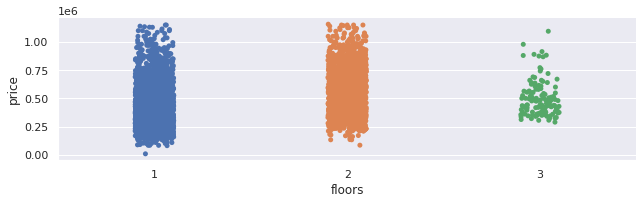

In [40]:
# Again, I will convert the data type to integer.

data6 = data5.copy()
data6.floors = data6.floors.astype(int)
print(data6.floors.value_counts())

sns.catplot(x='floors', y='price', data=data6, height=3, aspect=3)

In [41]:
# As I said at the beginning, Waterfront is divided into two categories, I will keep it that way.

data6.waterfront.value_counts()

0    4200
1      16
Name: waterfront, dtype: int64

In [42]:
# Since the number of house with a view is very few, it will be more useful for our analysis to see this feature as 0 and 1. 

print(data6.view.value_counts())

data7=data6.copy()
data7.view = data7.view.map({0:0, 1:1, 2:1, 3:1, 4:1})
print(data7.view.value_counts())



0    3911
2     154
3      64
1      54
4      33
Name: view, dtype: int64
0    3911
1     305
Name: view, dtype: int64


In [43]:
# There doesn't seem to be many homes in bad shape in the US, I'll just remove 1's.

print(data7.condition.value_counts())

data7 = data7[data7['condition']>1]

3    2623
4    1171
5     386
2      30
1       6
Name: condition, dtype: int64


<AxesSubplot:xlabel='sqft_above'>

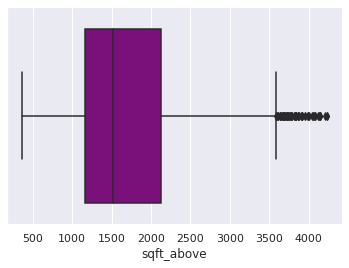

In [44]:
# I will keep sqft_above as is.

data8 = data7.copy()
sns.boxplot(data7.sqft_above, color= 'darkmagenta')

In [45]:
# I think removing 1% would be enough.

q = data8.sqft_basement.quantile(0.99)
data9 = data8[data8.sqft_basement<q]

(-100000.0, 1250000.0)

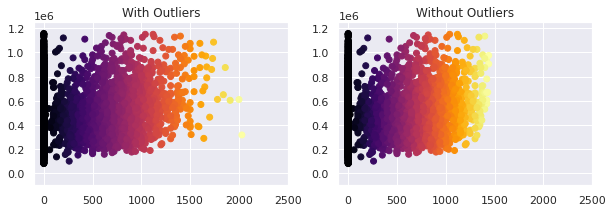

In [46]:
# There are many houses that do not have a basement.

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_basement', y= 'price', data = data8, c= 'sqft_basement', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(-100,2500)
ax1.set_ylim(-0.1e6,1.25e6)
ax2.scatter(x= 'sqft_basement', y= 'price', data = data9, c= 'sqft_basement', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(-100,2500)
ax2.set_ylim(-0.1e6,1.25e6)

<AxesSubplot:xlabel='yr_built'>

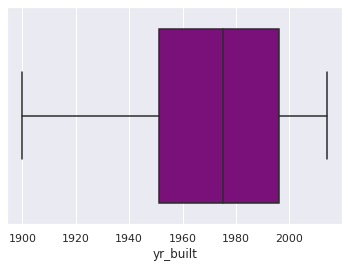

In [47]:
# I will keep building year as is.

sns.boxplot(data9.yr_built, color= 'darkmagenta')

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

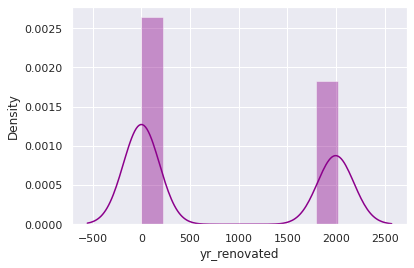

In [48]:
# This is the last feature I will take as renovated(1) not (0).

sns.distplot(data9.yr_renovated, color= 'darkmagenta')

In [49]:
data9.yr_renovated = pd.np.where(data9.yr_renovated==0,0,1)

In [50]:
# We've removed most of the outliers. First I'll just continue with numeric values.
# Let's continue by dropping the categorical variables and saving it as a separate data set.

data_pp = data9.drop(['date', 'city', 'street', 'statezip', 'country'], axis=1)
data_pp.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4167.0,478474.534624,208784.796665,80000.0,315684.35,440000.0,602250.0,1157400.0
bedrooms,4167.0,3.317495,0.844478,1.0,3.00,3.0,4.0,6.0
bathrooms,4167.0,1.681785,0.623212,0.0,1.00,2.0,2.0,3.0
sqft_living,4167.0,1965.253180,721.459840,370.0,1410.00,1890.0,2440.0,4240.0
sqft_lot,4167.0,11192.053516,16057.534463,638.0,5000.00,7476.0,10280.5,191228.0
floors,4167.0,1.439405,0.551794,1.0,1.00,1.0,2.0,3.0
waterfront,4167.0,0.003840,0.061854,0.0,0.00,0.0,0.0,1.0
view,4167.0,0.069354,0.254086,0.0,0.00,0.0,0.0,1.0
condition,4167.0,3.451884,0.665684,2.0,3.00,3.0,4.0,5.0
sqft_above,4167.0,1703.894648,710.554020,370.0,1160.00,1510.0,2137.0,4230.0


# Scaling the data

Scaling is transforming our data to fit on a specific scale like 0-100 or 0-1. It is critical when using metrics-based methods of how far away data points are, such as support vector machines (SVM) or k-nearest neighbors (KNN), rather than linear regression. However, I still think it will be useful to scale the data, I will use the Robust Scaler as there is still some outlier in our data.

In [51]:
data_pp = data_pp.reset_index(drop=True)

In [52]:
# Define the targets and inputs.

targets = data_pp.iloc[:,:1]
unscaled_inputs = data_pp.drop(['price'], axis = 1)

unscaled_inputs.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1,1340,7912,1,0,0,3,1340,0,1955,1
1,3.0,2,1930,11947,1,0,0,4,1930,0,1966,0
2,3.0,2,2000,8030,1,0,0,4,1000,1000,1963,0
3,4.0,2,1940,10500,1,0,0,4,1140,800,1976,1
4,2.0,1,880,6380,1,0,0,3,880,0,1938,1


In [53]:
# We will divide our data into train and test groups. This is important to avoid overfitting or underfitting.
# Overfitting means, our training has focused on the particular training data set so much, so it has missed the point. 
# Underfitting means the model has not captured the underlying logic of the data.

x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs, targets, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3333, 12) (3333, 1) (834, 12) (834, 1)


In [54]:
# I will keep features that contain only 0 or 1 data separately.

columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)

In [55]:
# Let's fit the scaler using only the training data, then transform both training and test data.

scaler = RobustScaler()  #StandardScaler()
scaler.fit(x_train_to_scale)

RobustScaler()

In [56]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [57]:
x_test_scaled = scaler.transform(x_test_to_scale)

In [58]:
# After scaling our training and test data are converted to np.arrays,
# Let's make them pd.DataFrame again and merge them with unscaled features.

x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

In [59]:
# Now, we are ready!

x_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,waterfront,view,yr_renovated
0,0.0,0.0,-0.215686,-0.716920,0.0,2.0,-0.536082,1.301887,-1.155556,0,0,1
1,0.0,-1.0,-0.254902,0.344106,0.0,1.0,0.134021,0.000000,-0.155556,0,0,0


# Model - Linear Regression

In [60]:
# Let's create the model as we did at the beginning.

x = sm.add_constant(x_train)
results = sm.OLS(y_train, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     257.4
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:24:09   Log-Likelihood:                -44524.
No. Observations:                3333   AIC:                         8.907e+04
Df Residuals:                    3321   BIC:                         8.915e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.748e+05   6663.309     56.242      0.000    3.62e+05    3.88e+05
bedrooms      -2.646e+04   4046.424     -6.538      0.000   -3.44e+04   -1.85e+04
bathrooms      2.809e+04   6043.273      4.648      0.000    1.62e+04    3.99e+04
sqft_living    3.958e+04   3452.131     11.465      0.000    3.28e+04    4.63e+04
sqft_lot      -3626.6854    943.429     -3.844      0.000   -5476.446   -1776.924
floors         5.941e+04   7035.534      8.444      0.000    4.56e+04    7.32e+04
condition      2.469e+04   4835.323      5.106      0.000    1.52e+04    3.42e+04
sqft_above     1.528e+05   3346.585     45.649      0.000    1.46e+05    1.59e+05
sqft_basement  7.234e+04   3641.422     19.866      0.000    6.52e+04    7.95e+04
yr_built      -8.163e+04   5732.205    -14.241      0.000   -9.29e+04   -7.04e+04
waterfront     5055.6355   4.57e+04      0.111      0.912   -8.46e+04    9.47e+04
view           7.736e+04   1.11e+04      6.981      0.000    5.56e+04    9.91e+04
yr_renovated   5633.5680   6258.043      0.900      0.368   -6636.442    1.79e+04
==============================================================================
Omnibus:                       89.508   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.995
Skew:                           0.321   Prob(JB):                     1.07e-25
Kurtosis:                       3.646   Cond. No.                     6.48e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
# We talked about the low contribution of variables with P values above 0.05 to the model, 
# so I'm going to drop the renovation year value and run the model again.

x_train_pv = x_train.drop(['yr_renovated'], axis=1)

In [62]:
# R2 and Adj. R2 is the same as before. 
# We did well by removing it out, because it's always better to keep the equation simple.

X = sm.add_constant(x_train_pv)
results = sm.OLS(y_train, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     283.1
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:24:10   Log-Likelihood:                -44524.
No. Observations:                3333   AIC:                         8.907e+04
Df Residuals:                    3322   BIC:                         8.914e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.776e+05   5862.403     64.412      0.000    3.66e+05    3.89e+05
bedrooms      -2.633e+04   4043.727     -6.510      0.000   -3.43e+04   -1.84e+04
bathrooms      2.775e+04   6031.195      4.600      0.000    1.59e+04    3.96e+04
sqft_living    3.909e+04   3408.769     11.467      0.000    3.24e+04    4.58e+04
sqft_lot      -3605.3686    943.105     -3.823      0.000   -5454.494   -1756.243
floors         5.873e+04   6994.461      8.396      0.000     4.5e+04    7.24e+04
condition        2.3e+04   4457.535      5.161      0.000    1.43e+04    3.17e+04
sqft_above     1.532e+05   3308.096     46.318      0.000    1.47e+05     1.6e+05
sqft_basement  7.266e+04   3623.797     20.051      0.000    6.56e+04    7.98e+04
yr_built      -8.322e+04   5452.425    -15.264      0.000   -9.39e+04   -7.25e+04
waterfront     4936.2704   4.57e+04      0.108      0.914   -8.47e+04    9.46e+04
view            7.77e+04   1.11e+04      7.016      0.000     5.6e+04    9.94e+04
==============================================================================
Omnibus:                       89.373   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.682
Skew:                           0.321   Prob(JB):                     1.25e-25
Kurtosis:                       3.644   Cond. No.                     6.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Encoding the Categorical Variables

We have developed our model quite well, but I would like to enrich it a bit more by adding some categorical variables. To do this we need to transform categorical data into appropriate numeric values, there is no single method how to approach this issue. Fortunately, python tools of pandas and scikit-learn provide several approaches that can be implemented. 

Here some methods that can be used:

**One-Hot Encoding**
One-Hot Encoding gets each group of any categorical variable a new variable by mapping each group to binary numbers (0 or 1). Used when data is nominal. Newly created binary properties can be considered as dummy variables.<br>
**Dummy Encoding**
The Dummy encoding scheme is similar to one-hot encoding. In the case of one-hot encoding, it uses N binary variables for N categories in a variable. Dummy encoding is a minor improvement over one-hot encoding, it uses N-1 properties to represent N tags/categories.<br>
**Effect Encoding**
When applying this encoding type, the categories are given values in the format -1,0,1. The -1 occurrence is the only difference between One-Hot encoding and effects encoding.<br>
**Label Encoding or Ordinal Encoding**
This type of encoding is used when the variables in the data are ordinal. It converts each label to integer values, and the encoded data represents the label array.

In [63]:
data_wd = data9.drop(['date', 'street', 'statezip', 'country'], axis=1)

In [64]:
# Get_dummies is one of the common ways to create dummy variables for categorical features

city_dummies = pd.get_dummies(data_wd.city, drop_first = True)
city_dummies

,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
# Let's define the variables one more time.

targets = data_wd.iloc[:,:1]

a = data_wd.drop(['price','city'], axis = 1)
unscaled_inputs_wd = pd.concat([a, city_dummies], axis=1)
unscaled_inputs_wd.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3.0,1,1340,7912,1,0,0,3,1340,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,2,1930,11947,1,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Split the targets and inputs into train-test data again.

x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs_wd, targets, test_size=0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3333, 55) (834, 55) (3333, 1) (834, 1)


In [67]:
x_train.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [68]:
columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)

In [69]:
# Scale as before

scaler = RobustScaler()

In [70]:
scaler.fit(x_train_to_scale)

RobustScaler()

In [71]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [72]:
x_test_scaled = scaler.transform(x_test_to_scale)

In [73]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

# Model - Linear Regression

In [74]:
# Yey! We managed to get much better results now.
# 'sqft_lot' and 'yr_renovated' features seems insignificant when we evaluate them according to their p-values.

X1 = sm.add_constant(x_train)
results = sm.OLS(y_train, X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     140.9
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:24:14   Log-Likelihood:                -43573.
No. Observations:                3333   AIC:                         8.725e+04
Df Residuals:                    3279   BIC:                         8.758e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.047e+05    6.3e+04      3.249      0.001    8.12e+04    3.28e+05
bedrooms            -1.432e+04   3100.673     -4.618      0.000   -2.04e+04   -8238.286
bathrooms             1.88e+04   4613.064      4.076      0.000    9757.371    2.78e+04
sqft_living          5.808e+04   1.13e+04      5.134      0.000    3.59e+04    8.03e+04
sqft_lot             1481.3927    783.494      1.891      0.059     -54.795    3017.580
floors               1.908e+04   5802.482      3.288      0.001    7704.522    3.05e+04
condition            2.677e+04   3756.132      7.128      0.000    1.94e+04    3.41e+04
sqft_above           1.241e+05   1.09e+04     11.405      0.000    1.03e+05    1.45e+05
sqft_basement        3.534e+04   6480.035      5.454      0.000    2.26e+04     4.8e+04
yr_built            -3.068e+04   5029.722     -6.099      0.000   -4.05e+04   -2.08e+04
waterfront           7.297e+04   3.82e+04      1.910      0.056   -1935.788    1.48e+05
view                 8.253e+04   8572.967      9.627      0.000    6.57e+04    9.93e+04
yr_renovated         -633.9705   4782.545     -0.133      0.895      -1e+04    8743.106
Auburn               2.539e+04   6.79e+04      0.374      0.708   -1.08e+05    1.58e+05
Beaux Arts Village   5.575e+05   1.34e+05      4.156      0.000    2.94e+05    8.21e+05
Bellevue             3.506e+05   6.77e+04      5.181      0.000    2.18e+05    4.83e+05
Black Diamond        1.195e+05   8.02e+04      1.490      0.136   -3.78e+04    2.77e+05
Bothell              1.592e+05   7.05e+04      2.258      0.024    2.09e+04    2.97e+05
Burien               1.085e+05   6.87e+04      1.578      0.115   -2.63e+04    2.43e+05
Carnation            9.039e+04   7.37e+04      1.227      0.220   -5.41e+04    2.35e+05
Clyde Hill           4.544e+05   8.51e+04      5.340      0.000    2.88e+05    6.21e+05
Covington            3.334e+04   6.99e+04      0.477      0.633   -1.04e+05     1.7e+05
Des Moines            3.98e+04   6.92e+04      0.575      0.565   -9.59e+04    1.76e+05
Duvall                1.14e+05   7.06e+04      1.615      0.106   -2.44e+04    2.52e+05
Enumclaw             8941.4019    7.2e+04      0.124      0.901   -1.32e+05     1.5e+05
Fall City            1.879e+05   7.78e+04      2.414      0.016    3.53e+04     3.4e+05
Federal Way          3.227e+04    6.8e+04      0.475      0.635   -1.01e+05    1.66e+05
Inglewood-Finn Hill -1.124e-09   4.93e-10     -2.283      0.023   -2.09e-09   -1.59e-10
Issaquah             2.467e+05   6.79e+04      3.633      0.000    1.14e+05     3.8e+05
Kenmore              1.669e+05   6.89e+04      2.421      0.016    3.17e+04    3.02e+05
Kent                 2.754e+04   6.78e+04      0.406      0.685   -1.05e+05     1.6e+05
Kirkland             2.793e+05   6.78e+04      4.120      0.000    1.46e+05    4.12e+05
Lak

In [75]:
x_train.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'waterfront', 'view', 'yr_renovated', 'Auburn',
       'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell',
       'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines',
       'Duvall', 'Enumclaw', 'Fall City', 'Federal Way',
       'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland',
       'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island',
       'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific',
       'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish',
       'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie',
       'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville',
       'Yarrow Point'], dtype=object)

## Assumption check for Lineer Regression

**1)Linearity** In the name says it all, we need to see a linear relationship between independent and dependent variables. We can basically determine this using scatter plots. It was also important to check for outliers since linear regression is sensitive to outlier effects. To fix: Run a non-linear regression, exponential transformation, log transformation

**2)No Endogeneity:** Omitted variable bias occurs when we forget to include a variable. This is reflected in the error term as the factor you forgot about is included in the error. In this way, the error is not random but includes a systematic part (the omitted variable).

**3)Normality and Homoscedasticy:** We have assumed that the errors have normal distribution, Zero Mean: Having an intercept solves that problem, in real life it is unusual to having that problem. Homoscedasticity: It means to having equal variance. To fix: Look for OVB, Look for outliers, Apply log transformation

**4)No Autocorrelation(no serial correlation):** Durbin Watson score falls between zero and four. <1 and >3 cause an alarm, if we detect the problem, we need to use alternative method.

**5)No Multicollinearity:** Independent variables that effect each others. To Fix= Drop one of the two variables, transform into one new variable.

In [76]:
# Let's check if there are multicollunearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# all features where we want to check for multicollinearity:
variables = x_train[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition',  'sqft_basement',
       'yr_built', 'view', 'yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point']]

# we create a new data frame which will include all the VIFs, 
# each variable has its own VIF as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Finally, I will include names so it is easier to explore the result
vif["Features"] = variables.columns

vif.sort_values(by='VIF')

,VIF,Features
32,1.004646,Medina
12,1.004922,Beaux Arts Village
34,1.006007,Milton
40,1.006948,Ravensdale
49,1.006966,Snoqualmie Pass
39,1.008650,Preston
38,1.008656,Pacific
47,1.012019,Skykomish
53,1.015874,Yarrow Point
14,1.017005,Black Diamond


In [77]:
# I will drop 'sqft_above' based on features VIF scores, 
# also 'sqft_lot' and 'yr_renovated' based on p-value that we have already determined.

x_train = x_train.drop(['sqft_above','sqft_lot','yr_renovated'], axis=1)
x_test = x_test.drop(['sqft_above','sqft_lot','yr_renovated'], axis=1)

In [78]:
# This time let's use sklearn to build our model.

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

<AxesSubplot:ylabel='Count'>

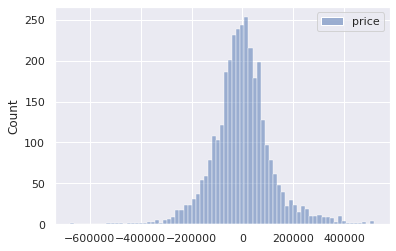

In [79]:
# Let's check the assumption of normality. 
# It seems quite good, right :)

y_hat = reg.predict(x_train)

sns.histplot(y_train - y_hat)

In [80]:
# To measure adjusted R2, I will write a simple function. (Train)

def adj_R2(x_train,y_train):
  r2 = reg.score(x_train,y_train)
  n = x_train.shape[0]
  p = x_train.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

adj_R2 = adj_R2(x_train,y_train)

In [81]:
# To measure adjusted R2, I will write a simple function. (Test)

def adj_R2_test(x_test,y_test):
  r2 = reg.score(x_test,y_test)
  n = x_test.shape[0]
  p = x_test.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

adj_R2_test = adj_R2_test(x_test,y_test)

In [82]:
# Our training and test scores are very similar,
# which means that overfitting was not observed in our model. 
print('R2-Train                      : {0:.2f}'.format(reg.score(x_train, y_train)*100))
print('R2-Test                       : {0:.2f}'.format(reg.score(x_test, y_test)*100))
print('Adj_R2-Train                  : {0:.2f}'.format(adj_R2*100))
print('Adj_R2-Test                   : {0:.2f}'.format(adj_R2_test*100))
print('MSE (Mean Squared Error)      : {0:.0f}'.format(metrics.mean_squared_error(y_train, y_hat)))
print('RMSE (Root Mean Squared Error): {0:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_hat))))
print('MAE (Mean Ablosute Error)     : {0:.0f}'.format(metrics.mean_absolute_error(y_train, y_hat)))

R2-Train                      : 69.46
R2-Test                       : 69.70
Adj_R2-Train                  : 68.98
Adj_R2-Test                   : 67.68
MSE (Mean Squared Error)      : 13281622417
RMSE (Root Mean Squared Error): 115246
MAE (Mean Ablosute Error)     : 83101


In [83]:
# Let's prepare a regression model summary table.

# Weights means for continuous variables: 
# positive weight = shows that as a feature increases in value, so do the price respectively
# negative weight = shows that as a feature increases in value, price decrease

# Weights means for dummy variables:
# positive weight = shows that the respective category(city) is more expensive than the benchmark
# negative weight = shows that the respective category(city) is less expensive than the benchmark 


reg_summary = pd.DataFrame(x_train.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_.reshape(-1,1)
reg_summary.index = reg_summary.index +1
reg_summary.loc[0] = ['Intercept (b0)', reg.intercept_[0]]
reg_summary = reg_summary.sort_index()
reg_summary


,Features,Weights
0,Intercept (b0),2.569647e+05
1,bedrooms,-1.459731e+04
2,bathrooms,1.851688e+04
3,sqft_living,1.903324e+05
4,floors,1.833115e+04
5,condition,2.692022e+04
6,sqft_basement,-3.284232e+04
7,yr_built,-3.115158e+04
8,waterfront,7.194858e+04
9,view,8.294878e+04


Our model has reached an acceptable point. Our next step should be to analyze our erroneous predictions in detail and work on them to improve our predictions. 💪

I hope that you find it useful. As I will be happy to improve myself, your comments and feedbacks are always welcome, as are suggestions for additional information that could usefully be included. Thank you! 🌸😊

